#### Inspecting an experiment

It's created by running `python examples/entrypoint/experiment.py`

In [1]:
!python ../entrypoint/task_with_defaults.py -y

Dry run for task __main__:train_model
Resolved Arguments
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Argument Name    ┃ Resolved Value                                            ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ batch_size       │ 2048                                                      │
│ epochs           │ 50                                                        │
│ model            │ Model(hidden_size=512, num_layers=3, activation='relu')   │
│ optimizer        │ Optimizer(learning_rate=0.0005, weight_decay=1e-05,       │
│                  │ betas=[0.9, 0.999])                                       │
└──────────────────┴───────────────────────────────────────────────────────────┘
Executor
┌──────────────────────────────────────────────────────────────────────────────┐
│ LocalExecutor(packager=Packager(debug=False), launcher=None, env_vars={},    │
│ retries=0, experiment_id=None, job_dir=''

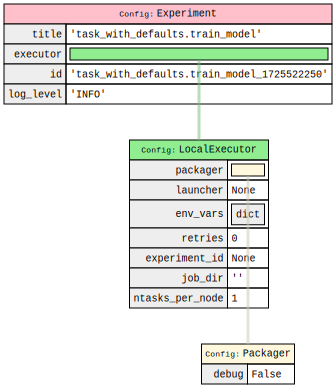

In [4]:
import nemo_run as run

# OR: run.Experiment.from_id("SOME_ID")
exp = run.Experiment.from_title(run.Experiment.catalog()[-1])
exp

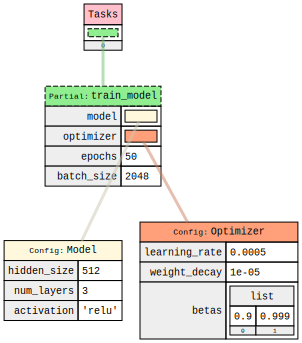

In [5]:
exp.tasks

In [6]:
exp.status()

Experiment Status for task_with_defaults.train_model_1725522250

Task 0: task_with_defaults.train_model
- Status: SUCCEEDED
- Executor: LocalExecutor
- Job id: task_with_defaults.train_model-jqnwz6dv243p5
- Local Directory: /Users/romeyn/.nemo_run/experiments/task_with_defaults.train_model/task_with_defaults.train_model_1725522250/task_with_defaults.train_model

#### Compare two experiments

In [9]:
!python ../entrypoint/task_with_defaults.py -y model.hidden_size=1024 batch_size=16

Dry run for task __main__:train_model
Resolved Arguments
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Argument Name    ┃ Resolved Value                                            ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ batch_size       │ 16                                                        │
│ epochs           │ 50                                                        │
│ model            │ Model(hidden_size=1024, num_layers=3, activation='relu')  │
│ optimizer        │ Optimizer(learning_rate=0.0005, weight_decay=1e-05,       │
│                  │ betas=[0.9, 0.999])                                       │
└──────────────────┴───────────────────────────────────────────────────────────┘
Executor
┌──────────────────────────────────────────────────────────────────────────────┐
│ LocalExecutor(packager=Packager(debug=False), launcher=None, env_vars={},    │
│ retries=0, experiment_id=None, job_dir=''

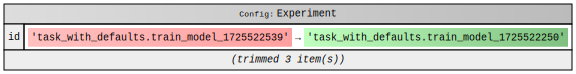

In [10]:
exp_2 = run.Experiment.from_title(run.Experiment.catalog()[-1])

exp.diff(exp_2)

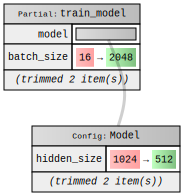

In [11]:
exp.tasks[0].diff(exp_2.tasks[0])

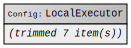

In [12]:
exp.executor.diff(exp_2.executor)